В прошлых модулях мы неоднократно говорили о важности предобработки данных и даже приводили основные этапы предобработки. В этом модуле мы продолжим эту тему и рассмотрим очистку данных, которая включает в себя следующие этапы:

Работа с пропущенными значениями.
Очистка данных от пропусков.
Удаление признаков и записей, которые не несут полезной информации.
?
Что кроется под термином «очистка данных»?

Очистка данных (data cleaning) — это процесс обнаружения и удаления (или исправления) повреждённых, ложных или неинформативных записей таблицы или целой базы данных. Процесс состоит из двух этапов: поиск и ликвидация (или редактирование).

Цель очистки данных — избавиться от «мусора», который может помешать моделированию или исказить его результаты. Во многих задачах очистка данных — это самая главная часть этапа подготовки данных к построению модели, которая нередко занимает большую часть времени работы над задачей.

Сложность очистки и, соответственно, время, затраченное на неё, зависят от сложности задачи и размера данных. Чем больше у вас источников данных, тем больше вероятность того, что необходимо будет проводить тщательную очистку. 

Время, которое специалист тратит на очистку, довольно индивидуально и зависит ещё и от его навыков. В среднем при работе с данными оно занимает около 40-60 % от общего времени работы с данными (включая построение модели).

Нередко оказывается так, что начинающие специалисты пропускают этот этап, сразу переходя к построению своей глубочайшей нейронной сети с невероятно сложной архитектурой и современными наворотами. Однако в результате есть риск столкнуться либо с ошибкой выполнения кода, либо переобученной под «мусор» моделью, предсказания которой мало сопоставимы с действительностью. 

Вспомните поговорку: «мусор на входе — мусор на выходе».

Рассмотрим пример того, как «мусор» может влиять на результат. На графиках ниже представлены две диаграммы рассеяния и две одинаковые линейные модели (прямые, которые пытаются повторить данные). На левом графике модель построена на «грязных» данных, содержащих аномалии, а на правом модель обучена на очищенных данных. 



Нетрудно заметить, как сильно аномалии влияют на результат моделирования и искажают его. Вторая прямая более точно описывает зависимость, нежели первая, хотя разница в данных составляет лишь пять исключённых из рассмотрения наблюдений.

Наша с вами беда состоит в том, что реальные данные почти всегда «грязные». В бизнес-задачах данные чаще всего представляют собой неструктурированный набор таблиц, в которых содержится куча всевозможного «мусора». 

Представьте, что мы пытаемся построить чудо-модель, которая поможет нам определить оптимальные пути развития нашей небольшой компании. Для этого нам понадобятся данные из многих отделов, и все они будут представлены разными форматами: данные об активности пользователей на сайте — в виде json-формата, для данных из бухгалтерии типичен формат excel, данные о показателях развития мы достанем из базы данных. 

На руках у нас будет куча таблиц в разных форматах, которые необходимо грамотно объединить. Но и это — не наша главная проблема. 

Для того чтобы «состряпать» большой и полезный датасет, необходимо отдельно обработать каждую из таблиц. В данных будет огромное количество «мусора»: начиная с несовпадающих периодов наблюдений (компания открылась раньше, чем её сайт), наименований категорий (различные названия отделов в каждой из таблиц) и пропущенных данных (мы могли потерять их в процессе выгрузки из базы), заканчивая некорректно введёнными значениями с парой лишних или недостающих нулей, которые по случайности вбила условная бухгалтер Алевтина Петровна. 

Этот модуль даст вам знания и навыки, которые помогут справиться с типичными проблемами «грязных данных» и не растеряться, когда вы впервые с ними столкнётесь. Мы индивидуально обсудим каждую проблему и приведём несколько техник поиска её обнаружения и устранения.

Цели модуля:

Рассмотреть методы определения пропусков в данных и основные методики работы с ними.
Познакомиться с методами поиска выбросов в данных и рассмотреть основные практики работы с ними.
Научиться определять дубликаты и неинформативные признаки в данных и избавляться от них.

В этом модуле мы с вами будем работать с данными с самого настоящего соревнования на платформе Kaggle, инициатором которого стал Сбер. Соревнование проводилось в 2017 году, его призовой фонд составил 25 000 $. Требования Сбера состояли в построении модели, которая бы прогнозировала цены на жильё в Москве, опираясь на параметры самого жилья, а также состояние экономики и финансового сектора в стране.

Датасет представляет собой набор данных из таблицы с информацией о параметрах жилья (train.csv). В ней содержатся 292 признака о состоянии экономики России на момент продажи недвижимости (macro.csv). 

Для упрощения техники очистки данных мы будем отрабатывать на урезанном датасете.

Скачать набор данных в формате csv (разделитель — ',') можно здесь (csv-файл находится в zip-архиве — распакуйте архив, прежде чем продолжать работу!)

Он содержит информацию о 61 признаке. Их значение мы будем объяснять в процессе работы с данными.

Импортируем библиотеки, которые нам понадобятся (pandas для работы с данными, numpy для математических преобразований, matplotlib и seaborn для визуализации):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем наши данные и выведем первые пять строк таблицы с помощью head(), чтобы убедиться в том, что всё подгрузилось верно:

In [2]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


Дополнительно посмотрим на последние пять строк таблицы с помощью tail():

In [3]:
display(sber_data.tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


Сколько районов Москвы и Московской области представлено в данных?

In [54]:
sber_data.value_counts('sub_area').count()

146

Чему равна максимальная цена квартир (price_doc)? Введите это число полностью, без округлений.

In [63]:
sber_data.describe()

,id,full_sq,life_sq,floor,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,mosque_count_1000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,23783.000000,30471.000000,23786.000000,30471.000000,30471.000000,16030.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,3271.272464,4.065111,8324.970739,4.705031,0.109678,1190.738677,...,1.505808,2.010973,1.328488,1.345235,2.330047,0.972014,9.638074,7.063236,0.019166,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,2169.759592,2.993795,4289.734174,3.445105,0.333328,1057.015001,...,2.253759,2.306446,1.526219,3.053600,2.986937,0.748876,7.112284,5.702807,0.137110,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1012.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004072,0.000000,0.026788,0.007903,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,1874.000000,2.000000,5782.000000,2.000000,0.000000,520.000000,...,0.483758,0.555231,0.474842,0.285124,0.860469,0.532480,4.225254,2.879357,0.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,2854.000000,4.000000,7377.000000,5.000000,0.000000,990.000000,...,0.839647,1.052999,0.899034,0.493048,1.490794,0.860037,8.612007,5.643495,0.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,4050.000000,6.000000,9891.000000,7.000000,0.000000,1786.000000,...,1.549517,3.046687,1.571062,0.936324,2.922264,1.248480,13.459593,10.328587,0.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,11926.000000,13.000000,24750.000000,14.000000,2.000000,4849.000000,...,26.259543,18.958933,24.268209,47.394706,45.669060,15.615728,87.600690,59.203148,1.000000,1.111111e+08


Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня экологической обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?

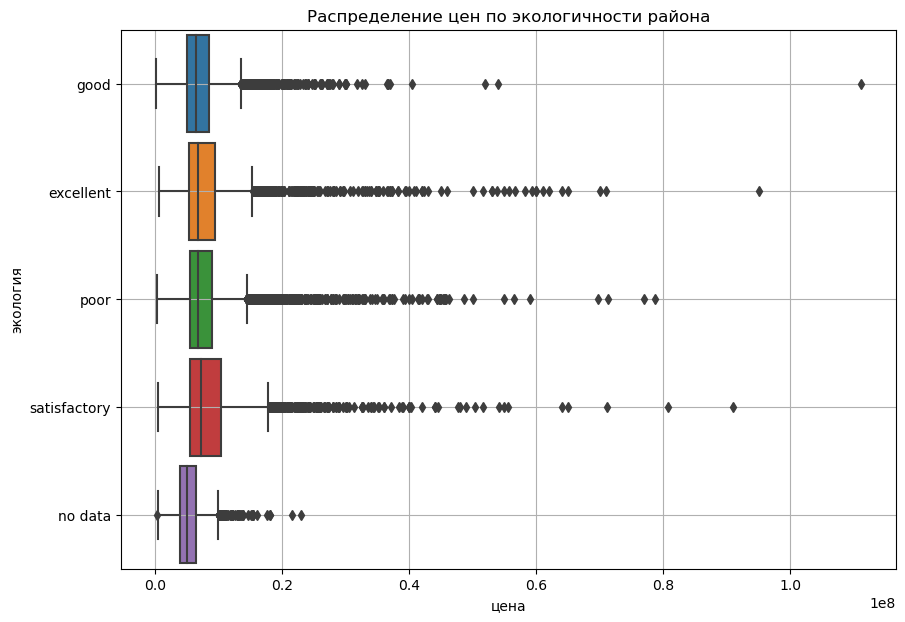

In [68]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=sber_data,
    y='ecology',
    x='price_doc',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение цен по экологичности района');
boxplot.set_xlabel('цена');
boxplot.set_ylabel('экология');
boxplot.grid()

Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) связана с расстоянием до центра Москвы (kremlin_km). Выберите все верные утверждения.

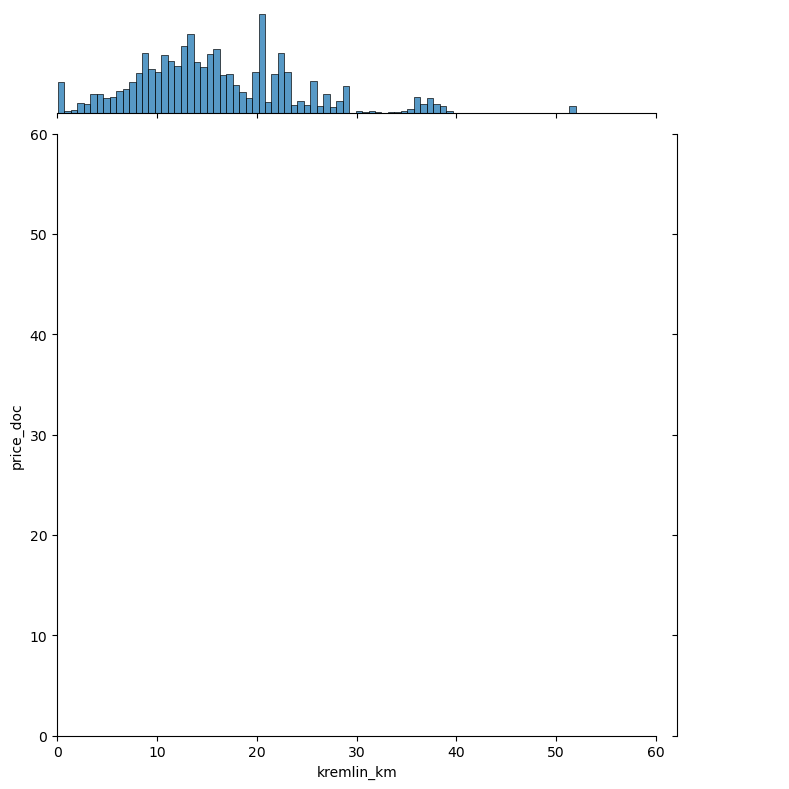

In [81]:
jointplot = sns.jointplot(
    data=sber_data, 
    x='kremlin_km', 
    y='price_doc',
    xlim = (0, 60),
    ylim = (0, 60),
    height=8,
)

Работа с отсутствующими записями в таблице, пожалуй, одна из самых сложных и неоднозначных. Она же — самая распространённая для реальных данных. С неё мы и начнём!

В pandas пропуски обозначаются специальным символом NaN (Not-a-Number — «не число»). 

Мы с вами уже сталкивались с пропусками, как только начали работать с настоящими данными. Вспомните датасеты о домах в Мельбурне и коронавирусе. 

?
Чем так плохи пропуски, почему так важно их предобработать?

Ответ очень прост: преобладающее большинство моделей машинного обучения не умеют обрабатывать пропуски, так как они работают только с числами. Если в данных содержится пустая ячейка таблицы, модель выдаст ошибку. 

ПРИЧИНЫ ПОЯВЛЕНИЯ ПРОПУСКОВ В ДАННЫХ

Ошибка ввода данных. Как правило, такая ошибка обусловлена человеческим фактором: никто не застрахован от случайного пропуска графы при заполнении данных.
Ошибка передачи данных. Эта причина на сегодняшний момент возникает довольно редко: с появлением протоколов проверки выгружаемой информации потерять данные при передаче их по сети становится сложнее, но вероятность такого события ненулевая.
Намеренное сокрытие информации. Одна из самых распространённых причин, особенно в социологических опросах. Дело в том, что пользователи/опрашиваемые/клиенты часто скрывают информацию о себе. Например, люди, занимающие высокие должности, могут быть связаны контрактом о неразглашении своих доходов. 
Прямое отсутствие информации. Эта причина очень распространена в данных для рекомендательных систем. Представьте, что у нас есть таблицы фильмов и пользователей, которые просматривают их и ставят им оценки. Мы объединяем всю информацию в одну большую сводную таблицу: например, по строкам идут пользователи, а по столбцам — фильмы. Но вот незадача: у нас нет информации о рейтингах фильмов, которые пользователь ещё не посмотрел. В таком случае на пересечении строки с именем пользователя и столбца с названием фильма, который он ещё не смотрел, ставится пропуск. Главное несчастье состоит в том, что 99 % процентов такой таблицы — это сплошной пропуск.
Мошенничество. Очень острая проблема в финансовой сфере, особенно в банковских данных. Мошенники нередко указывают ложную информацию или не указывают её вовсе.

КАК ОБНАРУЖИТЬ ПРОПУСКИ?

Ранее мы определяли наличие пропусков в данных с помощью метода info(). Но этот метод не позволяет точно локализовать места пропущенных значений, он выводит только число непустых значений и предназначен для определения факта наличия пропусков:



Найти пропуски зачастую довольно просто за исключением тех случаев, когда пропуски скрыты.

Ячейки с пропуском могут быть помечены специальным символом, например “?” или “no data”).
В библиотеке pandas специально для этого реализован метод isnull(). Этот метод возвращает новый DataFrame, в ячейках которого стоят булевы значения True и False. True ставится на месте, где ранее находилось значение NaN.

Посмотрим на результат работы метода на нашей таблице:

In [82]:
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Из таблицы можно увидеть, где были пропущены значения: ячейки со значением True; ячейки, где стоит False, были изначально заполнены.

✍️ Как вы сами понимаете, результат метода isnull() — это, мягко говоря, не самый удобный метод поиска пропусков, однако он является промежуточным этапом других способов, которые мы рассмотрим далее.

СПИСОК СТОЛБЦОВ С ПРОПУСКАМИ

Первый способ — это вывести на экран названия столбцов, где число пропусков больше 0. 

Для этого вычислим средний по столбцам результат метода isnull(). Получим долю пропусков в каждом столбце.

Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:

In [83]:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

Итак, можно увидеть, что у нас большое число пропусков (более 47 %) в столбце hospital_beds_raion (количество больничных коек в округе). 

Далее у нас идут столбцы с числом пропусков чуть больше 20 %: 

preschool_quota (число мест в детском саду в районе);
school_quota (число мест в школах в районе);
life_sq (жилая площадь здания в квадратных метрах). 
Менее одного процента пропусков содержат признаки:

floor (число этажей в доме);
metro_min_walk (время от дома до ближайшего метро пешком в минутах);
metro_km_walk (расстояние до ближайшего метро в километрах);
railroad_station_walk_km (расстояние до ближайшей ж. д. станции в километрах);
railroad_station_walk_min (время до ближайшей ж. д. станции пешком в минутах). 
Эти соотношения дают базовое понимание, какие дальнейшие преобразования со столбцами предстоит производить. Например, уже сейчас ясно, что столбец, в котором почти половина данных пропущена, не может дать нам полезной информации при прогнозировании. Если мы попытаемся его как-то исправить, мы можем только навредить и «нафантазировать» лишнего, поэтому от него, возможно, стоит избавиться. А вот столбцы с менее 1 % пропусков легко можно скорректировать: заполнить отсутствующие значения какими-то числами.

СТОЛБЧАТАЯ ДИАГРАММА ПРОПУСКОВ

Иногда столбцов с пропусками становится слишком много и прочитать информацию о них из списка признаков с цифрами становится слишком затруднительно — цифры начинают сливаться воедино. 

Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение числа пропусков к числу записей. Самый быстрый способ построить её — использовать метод plot():

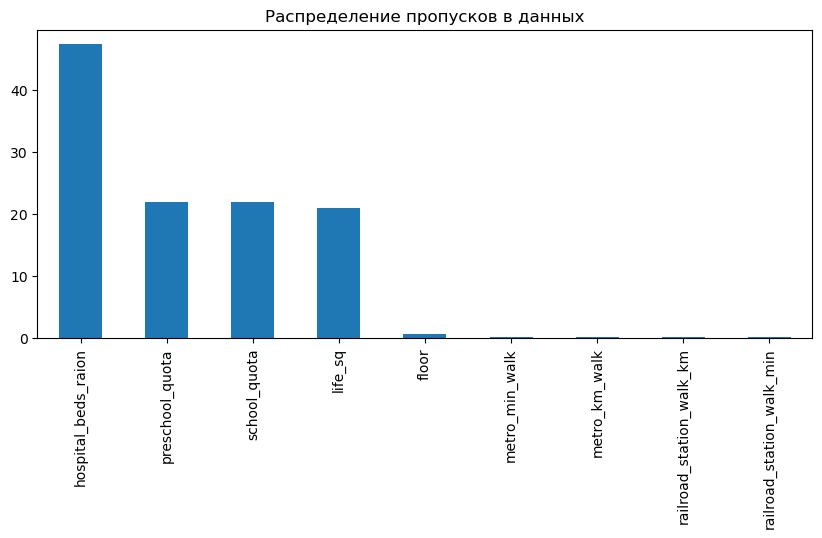

In [84]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

На диаграмме мы видим те же соотношения, что и раньше, но представленные в удобном для визуального восприятия формате. Из неё отчётливо видно, что число пропусков в столбце hospital_beds_raion превышает 45 %. Также мы видим признаки с числом пропусков близ 0.

ТЕПЛОВАЯ КАРТА ПРОПУСКОВ 

Ещё один распространённый способ визуализации пропусков — тепловая карта. 

Её часто используют, когда столбцов с пропусками не так много (меньше 10). Она позволяет понять не только соотношение пропусков в данных, но и их характерное местоположение в таблице. 

Для создания такой тепловой карты можно воспользоваться результатом метода isnull(). Ячейки таблицы, в которых есть пропуск, будем отмечать жёлтым цветом, а остальные — синим. Для этого создадим собственную палитру цветов тепловой карты с помощью метода color_pallete() из библиотеки seaborn.

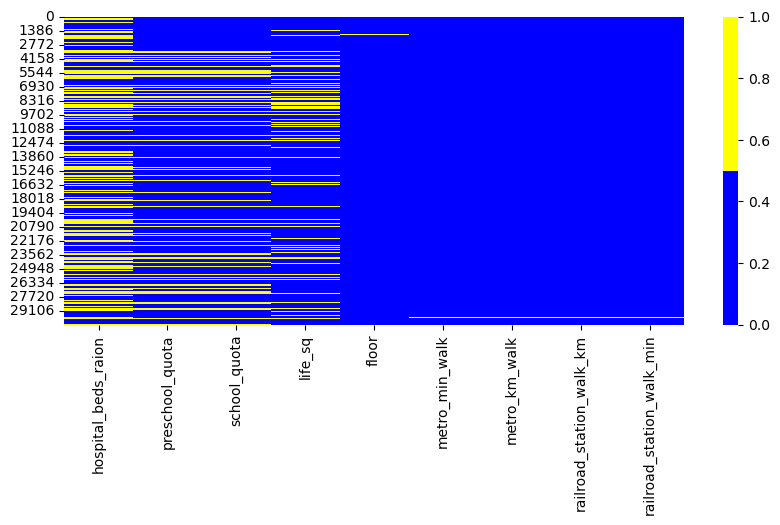

In [85]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

На полученной тепловой карте мы не видим чётких процентных соотношений для числа пропусков в данных, однако мы можем увидеть места их концентрации в таблице. Например, видно, что признаки preschool_quota и school_quota очень сильно связаны друг с другом по части пропусков: во всех записях, где хотя бы один не определён, не указан и второй (жёлтые линии для двух этих признаков полностью совпадают друг с другом).